In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data
import yfinance as yf

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#globals creates that string name from tech_list into a DataFrame variable
for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,172.081993,173.682590,170.808367,172.379203,171.950141,5.928801e+07
std,17.712812,17.448009,17.714587,17.504910,17.677828,1.777395e+07
min,126.010002,127.769997,124.169998,125.019997,124.325073,2.404830e+07
25%,161.474998,162.250000,160.294998,161.415001,160.762878,4.790395e+07
50%,175.179993,176.970001,173.820007,175.460007,175.229156,5.520920e+07
75%,186.779999,188.080002,185.119995,187.220001,186.952614,6.583690e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-30 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

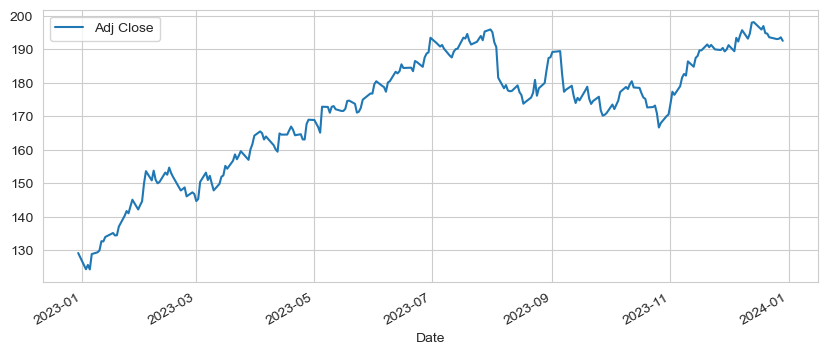

In [7]:
# historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

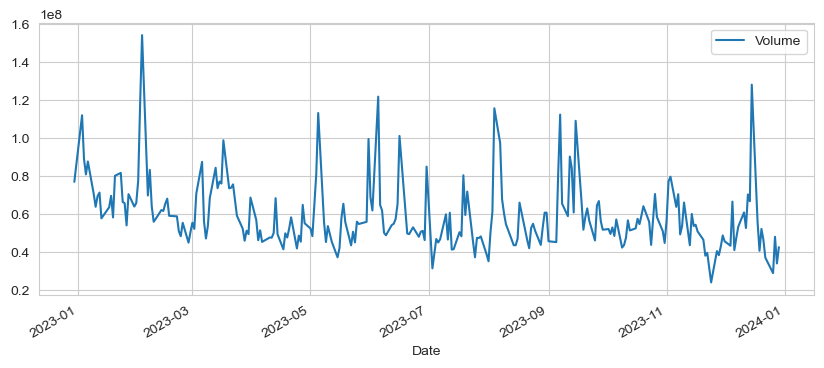

In [8]:
# plot total volume of stock being tarded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [10]:
ma_day=[10,20,50]

for ma in ma_day:
    
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

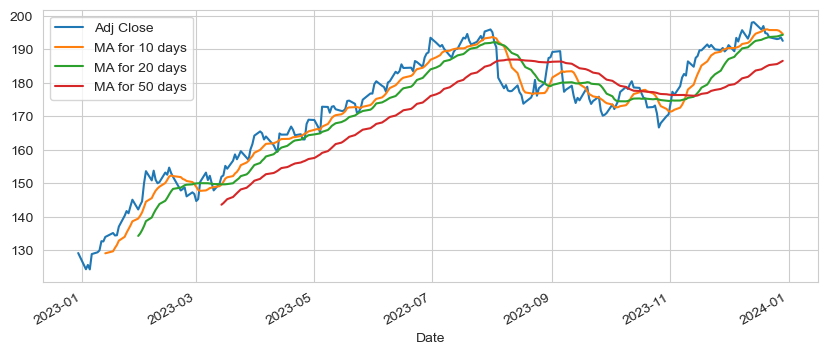

In [12]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))